In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import os, sys

In [3]:
import pandas as pd
from loguru import logger

In [4]:
sys.path.append('..')

from pyMultiOmics.constants import *
from pyMultiOmics.mapping import Mapper
from pyMultiOmics.common import set_log_level_info
from pyMultiOmics.analysis import *
from pyMultiOmics.query import *
from pyMultiOmics.pipelines import *

2021-02-17 10:36:56.891 | INFO     | pyMultiOmics.reactome:get_neo4j_driver:24 - Created graph database driver for bolt://localhost:7687 (neo4j)


# Demonstration of pyMultiOmics

## Load the processed Zebrafish data from [1]

[1] [Rabinowitz, Jeremy S., et al. "Transcriptomic, proteomic, and metabolomic landscape of positional memory in the caudal fin of zebrafish." Proceedings of the National Academy of Sciences 114.5 (2017): E717-E726.](https://www.pnas.org/content/114/5/E717.short)

In [5]:
DATA_FOLDER = os.path.abspath(os.path.join('test_data', 'zebrafish_data'))
DATA_FOLDER

'C:\\Users\\joewa\\Work\\git\\pyMultiOmics\\notebooks\\test_data\\zebrafish_data'

Read transcriptomics data (identified by their gene ids)

In [6]:
gene_data = pd.read_csv(os.path.join(DATA_FOLDER, 'gene_data_combined.csv'), index_col='Identifier')
gene_design = pd.read_csv(os.path.join(DATA_FOLDER, 'gene_design.csv'), index_col='sample')

Read proteomics data

In [7]:
protein_data = pd.read_csv(os.path.join(DATA_FOLDER, 'protein_data.csv'), index_col='Uniprot')
protein_design = pd.read_csv(os.path.join(DATA_FOLDER, 'protein_design.csv'), index_col='sample')

Read metabolomics data

In [8]:
compound_data = pd.read_csv(os.path.join(DATA_FOLDER, 'compound_data_kegg.csv'), index_col='Identifier')
compound_design = pd.read_csv(os.path.join(DATA_FOLDER, 'compound_design.csv'), index_col='sample')

In [9]:
set_log_level_info()

1

## Create a mapping object

The mapping object uses Reactome to map the different biological entities in the data:
- Transcripts (or genes) are connected to the proteins they encode
- Proteins and compounds are connected to reactions they're involved in
- Reactions are connected to pathways

In [10]:
m = Mapper(DANIO_RERIO, metabolic_pathway_only=True) \
        .set_gene(gene_data, gene_design) \
        .set_protein(protein_data, protein_design) \
        .set_compound(compound_data, compound_design) \
        .build()

2021-02-17 10:36:58.013 | INFO     | pyMultiOmics.functions:reactome_mapping:72 - Mapping genes -> proteins
2021-02-17 10:36:58.903 | INFO     | pyMultiOmics.functions:reactome_mapping:77 - Mapping proteins -> reactions
2021-02-17 10:37:01.309 | INFO     | pyMultiOmics.functions:reactome_mapping:85 - Mapping compounds -> reactions
2021-02-17 10:37:02.260 | INFO     | pyMultiOmics.functions:reactome_mapping:91 - Mapping reactions -> pathways
2021-02-17 10:37:02.618 | INFO     | pyMultiOmics.functions:reactome_mapping:102 - Mapping reactions -> proteins
2021-02-17 10:37:05.158 | INFO     | pyMultiOmics.functions:reactome_mapping:109 - Mapping reactions -> compounds
2021-02-17 10:37:06.545 | INFO     | pyMultiOmics.functions:reactome_mapping:121 - Mapping proteins -> genes
2021-02-17 10:37:21.783 | INFO     | pyMultiOmics.mapping:_add_nodes:181 - Processing nodes: genes
2021-02-17 10:37:24.180 | INFO     | pyMultiOmics.mapping:_add_nodes:181 - Processing nodes: proteins
2021-02-17 10:37:2

## DE analysis

In [11]:
method = INFERENCE_T_TEST
ap = AnalysisPipeline(m)

ap.run_de(method, GENES, 'Distal', 'Proximal')
ap.run_de(method, GENES, 'Distal', 'Middle')
ap.run_de(method, GENES, 'Proximal', 'Middle')

ap.run_de(method, PROTEINS, 'Distal', 'Proximal')
ap.run_de(method, PROTEINS, 'Distal', 'Middle')
ap.run_de(method, PROTEINS, 'Proximal', 'Middle')

ap.run_de(method, COMPOUNDS, 'Distal', 'Proximal')
ap.run_de(method, COMPOUNDS, 'Distal', 'Middle')
ap.run_de(method, COMPOUNDS, 'Proximal', 'Middle')

2021-02-17 10:37:32.269 | INFO     | pyMultiOmics.pipelines:run_ttest:120 - t-test case is Distal, control is Proximal
2021-02-17 10:37:48.241 | INFO     | pyMultiOmics.pipelines:run_ttest:120 - t-test case is Distal, control is Middle
2021-02-17 10:38:05.960 | INFO     | pyMultiOmics.pipelines:run_ttest:120 - t-test case is Proximal, control is Middle
2021-02-17 10:38:20.308 | INFO     | pyMultiOmics.pipelines:run_ttest:120 - t-test case is Distal, control is Proximal
2021-02-17 10:38:21.978 | INFO     | pyMultiOmics.pipelines:run_ttest:120 - t-test case is Distal, control is Middle
2021-02-17 10:38:23.640 | INFO     | pyMultiOmics.pipelines:run_ttest:120 - t-test case is Proximal, control is Middle
2021-02-17 10:38:25.305 | INFO     | pyMultiOmics.pipelines:run_ttest:120 - t-test case is Distal, control is Proximal
2021-02-17 10:38:25.390 | INFO     | pyMultiOmics.pipelines:run_ttest:120 - t-test case is Distal, control is Middle
2021-02-17 10:38:25.478 | INFO     | pyMultiOmics.pipe

In [12]:
ap.run_de(method, COMPOUNDS, 'Distal', 'Proximal')

2021-02-17 10:38:25.694 | WARNING  | pyMultiOmics.analysis:run_de:41 - DE analysis for data_type=3 case=Distal control=Proximal already exists


In [13]:
df = ap.de_results(GENES, 'Distal', 'Proximal')
df.head(10)

,padj_Distal_vs_Proximal,FC_Distal_vs_Proximal
ENSDARG00000000001,2.446040e-02,0.715686
ENSDARG00000000002,5.147844e-01,0.127781
ENSDARG00000000018,3.630210e-03,-0.620668
ENSDARG00000000019,4.935084e-02,0.349941
ENSDARG00000000068,3.961284e-01,-0.113797
ENSDARG00000000069,3.747644e-02,-0.296828
ENSDARG00000000086,2.716414e-02,-0.457724
ENSDARG00000000103,1.910610e-07,-1.543940
ENSDARG00000000142,8.461476e-03,0.354184
ENSDARG00000000151,2.412045e-01,0.112137


## Query results

Retrieve a single node

In [14]:
node_id = '15366'
res = QueryBuilder(ap) \
        .add(Entity(node_id)) \
        .run()
res

,display_name,data_type,observed
entity_id,,,
15366,Acetic acid,compounds,False


Retrieve multiple nodes

In [15]:
node_id = ['15366', 'ENSDARG00000037781', 'F1QAA7']
res = QueryBuilder(ap) \
        .add(Entity(node_id)) \
        .run()
res

,display_name,data_type,observed
entity_id,,,
15366,Acetic acid,compounds,False
ENSDARG00000037781,Acss2,genes,True
F1QAA7,F1QAA7,proteins,True


Retrieve nodes connected to a single node

In [16]:
query_id = 'F1QAA7'
res = QueryBuilder(ap) \
        .add(Entity(query_id)) \
        .add(Connected()) \
        .run()
res

,display_name,data_type,observed
entity_id,,,
ENSDARG00000037781,Acss2,genes,True
16027,Adenosine 5-monophosphate,compounds,True
15351,Acetyl-coa,compounds,False
29888,Diphosphoric acid,compounds,False
15346,Coenzyme a,compounds,False
30616,Atp(4-),compounds,False
15366,Acetic acid,compounds,False
R-DRE-71735,Acetate + coa + atp => acetyl-coa + amp + pyro...,reactions,None
R-DRE-71384,Ethanol oxidation,pathways,None


Retrieve top-10 significantly changing genes

In [42]:
case = 'Distal'
control = 'Proximal'
pval = 0.05
fc_lte = -2
fc_gte = 2
N = 20

In [43]:
res = QueryBuilder(ap) \
        .add(Select(GENES)) \
        .add(SignificantDE(case, control, pval, fc_lte=fc_lte, fc_gte=fc_gte, N=N)) \
        .run()
res

,display_name,data_type,observed,padj_Distal_vs_Proximal,FC_Distal_vs_Proximal
ENSDARG00000045854,Fgf23,genes,True,3.569550e-10,24.000289
ENSDARG00000071091,Chrm3a,genes,True,3.307603e-11,22.486196
ENSDARG00000104259,Cabz01072885.1,genes,True,2.782933e-10,20.545646
ENSDARG00000005522,Galr1a,genes,True,2.091894e-09,20.531569
ENSDARG00000091254,Si:ch73-59p9.2,genes,True,3.736906e-10,19.689389
ENSDARG00000008541,Chia.4,genes,True,3.736906e-10,19.689389
ENSDARG00000093738,Pth1a,genes,True,3.736906e-10,19.689389
ENSDARG00000037946,Prl,genes,True,3.736906e-10,19.689389
ENSDARG00000036171,Rnasel3,genes,True,1.848146e-11,19.636782
ENSDARG00000026484,Rab15,genes,True,3.569550e-10,19.138412


Find the compounds that are connected to the DE genes above

In [44]:
res = QueryBuilder(ap) \
        .add(Select(GENES)) \
        .add(SignificantDE(case, control, pval, fc_lte=fc_lte, fc_gte=fc_gte, N=N)) \
        .add(Connected(data_type=COMPOUNDS)) \
        .run()
res

,display_name,data_type,observed
entity_id,,,
78579,Aflatoxin b1 endo-cysteinylglycine conjugate,compounds,False
78581,Aflatoxin b1 endo glutathione conjugate,compounds,False
78587,Aflatoxin b1 exo glutathione conjugate,compounds,False
15377,Water,compounds,False
78584,Aflatoxin b1 exo-cysteinylglycine conjugate,compounds,False
29985,L-glutamate(1-),compounds,False
16856,Glutathione,compounds,True
4047,L-cysteinylglycine,compounds,True
28666,Leukotriene d4,compounds,False


Plot some heatmap using Plotly

In [45]:
res = QueryBuilder(ap) \
        .add(Select(GENES)) \
        .add(SignificantDE(case, control, pval, fc_lte=fc_lte, fc_gte=fc_gte, N=N)) \
        .run()
res

,display_name,data_type,observed,padj_Distal_vs_Proximal,FC_Distal_vs_Proximal
ENSDARG00000045854,Fgf23,genes,True,3.569550e-10,24.000289
ENSDARG00000071091,Chrm3a,genes,True,3.307603e-11,22.486196
ENSDARG00000104259,Cabz01072885.1,genes,True,2.782933e-10,20.545646
ENSDARG00000005522,Galr1a,genes,True,2.091894e-09,20.531569
ENSDARG00000091254,Si:ch73-59p9.2,genes,True,3.736906e-10,19.689389
ENSDARG00000008541,Chia.4,genes,True,3.736906e-10,19.689389
ENSDARG00000093738,Pth1a,genes,True,3.736906e-10,19.689389
ENSDARG00000037946,Prl,genes,True,3.736906e-10,19.689389
ENSDARG00000036171,Rnasel3,genes,True,1.848146e-11,19.636782
ENSDARG00000026484,Rab15,genes,True,3.569550e-10,19.138412


In [46]:
case_group = design_df[design_df['group'] == case].index.values.tolist()
control_group = design_df[design_df['group'] == case].index.values.tolist()
selection = case_group + control_group
selection

['US-1584738',
 'US-1584722',
 'US-1584712',
 'US-1584754',
 'US-1584765',
 'US-1584738',
 'US-1584722',
 'US-1584712',
 'US-1584754',
 'US-1584765']

In [47]:
data_type = GENES
data_df, design_df = ap.mapping.get_dfs(data_type)
df = data_df.loc[res.index.values]

min_replace = SMALL
wi = WebOmicsInference(df, design_df, data_type, min_value=min_replace)
heatmap_df = wi.data_df[selection]

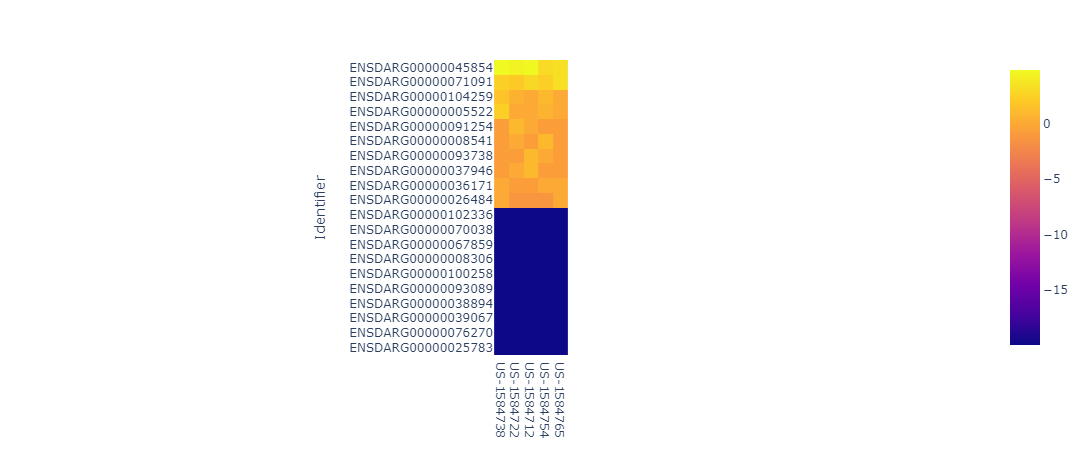

In [55]:
from plotly import express as px
px.imshow(np.log2(heatmap_df))

In [58]:
heatmap_df.loc['ENSDARG00000045854']

US-1584738    28.0
US-1584722    22.0
US-1584712    27.0
US-1584754     8.0
US-1584765    10.0
US-1584738    28.0
US-1584722    22.0
US-1584712    27.0
US-1584754     8.0
US-1584765    10.0
Name: ENSDARG00000045854, dtype: float64

In [59]:
heatmap_df.loc['ENSDARG00000025783']

US-1584738    0.000001
US-1584722    0.000001
US-1584712    0.000001
US-1584754    0.000001
US-1584765    0.000001
US-1584738    0.000001
US-1584722    0.000001
US-1584712    0.000001
US-1584754    0.000001
US-1584765    0.000001
Name: ENSDARG00000025783, dtype: float64